# project.ipynb
## Ciaran Moran
## Student ID: G00426050
## Email: G00426050@atu.ie

## This notebook is for Python project for the ATU course *Applied Statistics*.


## A look at the PlantGrowth data set
Information from https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html
  
### Description
Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions.
  
### Usage
PlantGrowth

### Format
A data frame of 30 cases on 2 variables.  
  
[, 1]	weight	numeric  
[, 2]	group	factor  
  
The levels of group are ‘ctrl’, ‘trt1’, and ‘trt2’.  

### Source
Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall.

### Examples
### One factor ANOVA example from Dobson's book, cf. Table 7.4:
require(stats); require(graphics)  
boxplot(weight ~ group, data = PlantGrowth, main = "PlantGrowth data",  
        ylab = "Dried weight of plants", col = "lightgray",  
        notch = TRUE, varwidth = TRUE)  
anova(lm(weight ~ group, data = PlantGrowth))  

  


## Some general websites used for references, help, ideas and general inspiration.
[Python](https://www.python.org/)  
[Pandas](https://pandas.pydata.org/)  
[Matplotlib](https://matplotlib.org/)  
[Markdown Guide](https://www.markdownguide.org/basic-syntax/)  
[Github Help](https://support.github.com/)  
[Reddit Python](https://www.reddit.com/r/Python/)  
[Reddit Statistics](https://www.reddit.com/r/statistics/)  
[StackOverflow](https://stackoverflow.com/)  
[ChatGPT](https://chatgpt.com/)  
[Copilot](https://copilot.microsoft.com/)  
[Google Search](https://www.google.ie/)  
[YouTube](https://www.youtube.com/)  



### Imports section

In [1]:
# Imports
# https://pandas.pydata.org/
import pandas as pd
# https://matplotlib.org/stable/tutorials/pyplot.html
import matplotlib.pyplot as plt
# https://seaborn.pydata.org/
import seaborn as sns
# https://docs.python.org/3/library/csv.html
import csv
# https://scipy.org/
import scipy 

## 1. Download and save the dataset to your repository.  
[PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv)

In [2]:
# Saved the csv file from https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv
# Set the csv location and filename
csvfilename='data\PlantGrowth.csv'

In [3]:
# Open the data file
#https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# Using code from https://docs.python.org/3/library/csv.html
#with open('data\PlantGrowth.csv', newline='') as csvfile:
#    reader = csv.DictReader(csvfile)
#    for row in reader:
       # print(row['weight'], row['group'])
#print(row)

# References for opening and reading csv files
#https://stackoverflow.com/questions/29026664/how-to-import-data-from-csv-using-python
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
#https://www.statology.org/pandas-read-csv-column-name/#:~:text=The%20names%20argument%20takes%20a,it%20as%20the%20header%20row.
df = pd.read_csv(csvfilename, usecols=['weight','group'])

## 2. Describe the data set in your notebook.

## Describe dataframe
[pandas: Get summary statistics for each column with describe()](https://note.nkmk.me/en/python-pandas-describe/#:~:text=In%20pandas%2C%20the%20describe(),and%20mode%20for%20each%20column.)

The describe of the dataframe shows the following statistics for the weight column.  
  
|       | **weight** |
|-------|:----------:|
| count |  30.000000 |
|  mean |   5.073000 |
|   std |   0.701192 |
|   min |   3.590000 |
|   25% |   4.550000 |
|   50% |   5.155000 |
|   75% |   5.530000 |
|   max |   6.310000 |


In [4]:
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


### Head of the data set
[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head)

This shows that the first row in the csv contains the column header.  
    column 1 - rownames - 1 through to 30   
    column 2 - weight - numeric weight of the plants within each group  
    column 3 - group  - treatment group. Note there are 3 groups , which we will see later ‘ctrl’, ‘trt1’, and ‘trt2’  
    

In [5]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


## Group column unique values
[Find the unique values in a column and then sort them](https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them)  
  
Group column unique values:  ['ctrl', 'trt1', 'trt2']  

In [6]:
g = df['group'].unique()
print('Group column unique values: ', sorted(g))

Group column unique values:  ['ctrl', 'trt1', 'trt2']


### Create a boxplot for the data  
[matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)  
[Box Plot in Python using Matplotlib](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/)      

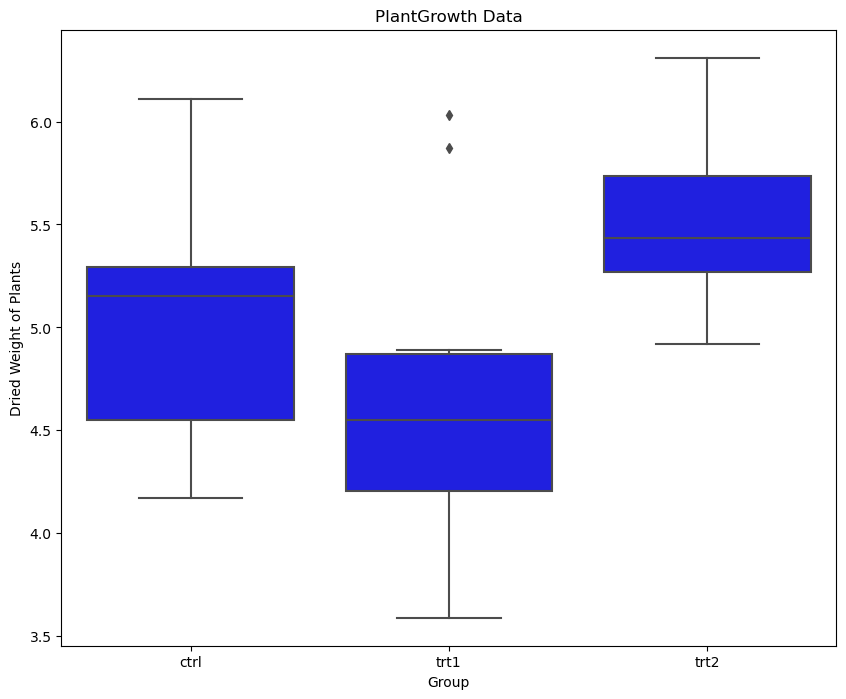

In [7]:

plt.figure(figsize=(10, 8))
sns.boxplot(x='group', y='weight', data=df, color='blue', width=.8)
plt.title("PlantGrowth Data")
plt.xlabel("Group")
plt.ylabel("Dried Weight of Plants")
plt.show()

## 3. Describe what a t-test is, how it works, and what the assumptions are.
References  
[Wikipedia Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)  
[An Introduction to t Tests | Definitions, Formula and Examples](https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.)  
[T Test (Student’s T-Test): Definition and Examples](https://www.statisticshowto.com/probability-and-statistics/t-test/)  

### What is a T-test
A t-test is a statistical test used to compare the mean/averages of two groups and see if they are different from each other. It helps one understand if the differences between the two groups are significient enough to be considered meaningful, or alternatively if they might have happened by chance.  

Note. If more than two groups are involved, then an ANOVA Test can be used instead.  
  
### How does a T-test work  
First you state a hypothesis, called the "null hypothesis".  
That is that there is no difference, the two groups are the same.  
For example, if a company implements a new process, the null hypothesis would mean that there is no difference betwwen the old process being replaced and the new process replacing it. Therefore the new process makes no difference (waste of time?).  
It is what is assumed to be true before testing for differences, and this belief holds true unless testing the underlying data demonstrates otherwise.  
  
The t-test assumes that the data is:-  

1. Independent  
2. Normally distributed  
    2.1 When plotted the data displays in a uniform bell shaped graph  
    2.2 Most of the values reside in the middle and fewer values moving away from the middle  
    2.3 Very few or no values that are outliers   
    2.4 Both groups data have a similar plot spread / bell curve
3. Have a similar amount of variance within each group being compared  



### The steps involved in conducting a T-test  
1. State a hypothesis e.g. the null hypothesis
2. Collect the data for both groups being compared
3. Calculate the t-statistic. This compares the differences beetween the group averages and results in a score for the difference.    
4. The t-statistic is then compared to a critical value, which can be found from a table e.g. [Scribbr Student's t Table (Free Download)](https://www.scribbr.com/statistics/students-t-table/)
5. If the t-statistic is greater than the critical value, then this suggests the groups are different. Otherwise they are similar enough.
6. If the t-statistic is large enough, then we can reject the original hypothesis (null hypothesis), and say there is a significant difference between the groups.


## 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.



### Referenced websites
[SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)  
[How to Do a T-Test in Python](https://builtin.com/data-science/t-test-python)  
[YouTube Hypothesis Testing and T-Tests](https://youtu.be/CIbJSX-biu0)  
[Basic Statistics in Python: t tests with SciPy](https://neuraldatascience.io/5-eda/ttests.html)  
[How to Extract Value from a DataFrame: A Guide for Data Scientists](https://saturncloud.io/blog/how-to-extract-value-from-a-dataframe-a-comprehensive-guide-for-data-scientists/)

In [8]:
# Extract the values for the two treatment groups trt1 and trt2
trt1_data = df[df['group'] == 'trt1']['weight']
trt2_data = df[df['group'] == 'trt2']['weight']

#print ("trt1_data:", trt1_data)
#print ("trt2_data:", trt2_data)

# Perform the t-test to compare the means of the two groups trt1 and trt2
t_stat, p_value = scipy.stats.ttest_ind(trt1_data, trt2_data)

# Print the results
print("T-statistic: ",  t_stat)
print("P-value: ", p_value)

# Display the results
if p_value < 0.05:
    print("As p_value is less than 0.05, we can say that there is a significant difference between the two treatment groups.")
else:
    print("As p_value is not less than 0.05, we can say that there is no significant difference between the two treatment groups.")

T-statistic:  -3.0100985421243616
P-value:  0.0075184261182198574
As p_value is less than 0.05, we can say that there is a significant difference between the two treatment groups.


### T-Test Conclusion
As the p value is less than 0.05 (0.0075184261182198574), then it can be said that there is a signifiicant difference between the two treatment groups.  

## 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

### References used
[Wikipedia Anova](https://en.wikipedia.org/wiki/Analysis_of_variance)  
[DataTab Analysis of Variance](https://datatab.net/tutorial/anova)  
[Statistics How To - ANOVA Test](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/)


### What is ANOVA (Analysis of Variance)
ANOVA, or Analysis of Variance, is a statistical method used to compare the means of different groups to see if they are different from each other. It was created by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher). ANOVA works by breaking down the total variation in data into parts that come from different sources. It helps us test if the averages of two or more groups are the same or not. ANOVA extends the t-test to accommodate more than two groups (where as teh t-test only handles two groups).  
  
There are different types of analysis of variance. Each one can be calculated either with our wihtout repeated measurements. A number of examples are:-  
 - One-factor (or one-way) ANOVA  
 - Two-factors (or two-way) ANOVA  
 - One-factor ANOVA with repeated measurements  
 - Two-factors ANOVA with repeated measurements  

  
![ANOVA Image](https://datatab.net/assets/tutorial/anova.png)  
(External image source linked from https://datatab.net/tutorial/anova)  
  
### ANOVA instead of T-Test  
ANOVA should be used where there is more than 2 groups of data to be tested. The reason for this is that the t-test involves an element of "probability of error", said to be around 5%. It would be possible to run a t-test on every 2 grpups of data. However then, statictically speaking, every 20th test would give a wrong result.  
  
This is where ANOVA can be used instead.

## One-way and two-way ANOVA
One-way ANOVA is used when you want to compare the means of three or more groups based on one factor. For example, if you want to see if different types of diets affect weight loss, you would use one-way ANOVA to compare the weight loss across different diet groups.

Two-way ANOVA is used when you want to compare the means based on two factors. For example, if you want to see how different types of diets and different exercise routines affect weight loss, you would use two-way ANOVA to compare the weight loss across different combinations of diet and exercise routines.

So one-way ANOVA looks at one factor, while two-way ANOVA looks at two factors.



In [ ]:
# Group the data by the treatment (trt) column
# Extract the weights for each of the 3 groups
data_data = df[df['trt'] == 'ctrl']['weight']
data_trt1 = df[df['trt'] == 'trt1']['weight']
data_trt2 = df[df['trt'] == 'trt2']['weight']